In [7]:
import numpy as np
import matplotlib.pyplot as plt
import wolff as wf

In [8]:
Lx = 40
Ly = 40
J = 1
Beta = 0.45

initial_lattice, neighs = wf.create_lattice(Lx = Lx, Ly = Ly)

In [9]:
Es, latcont = wf.wolff_algorithm(lattice = initial_lattice.copy(), neighs = neighs, Beta = Beta, J = J,
                             Lx = Lx, Ly = Ly, itnum = 1500)

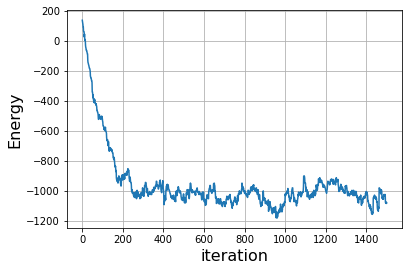

In [16]:
fig = plt.figure()
plt.plot(Es)
plt.xlabel(r"iteration", fontsize = 16)
plt.ylabel(r"Energy", fontsize = 16)
plt.grid(True)
plt.show()

Text(0, 0.5, 'y')

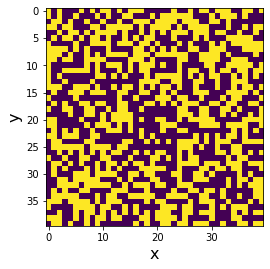

In [22]:
fig = plt.figure()
plt.imshow(latcont[0])
plt.xlabel("x", fontsize = 16)
plt.ylabel("y", fontsize = 16)

Text(0, 0.5, 'y')

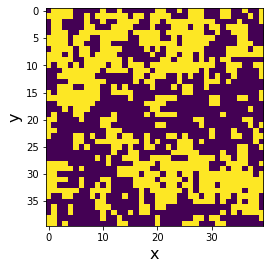

In [23]:
fig = plt.figure()
plt.imshow(latcont[-1])
plt.xlabel("x", fontsize = 16)
plt.ylabel("y", fontsize = 16)

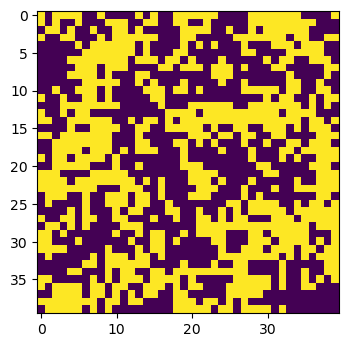

In [24]:
wf.anim(latcont)

In [25]:
Betas = np.linspace(0.4,0.48,10)

In [27]:
Ef = wf.ensemble_av(Betas = Betas, J = J, Lx = Lx, Ly = Ly, itnum = 3000, ens_num = 100)

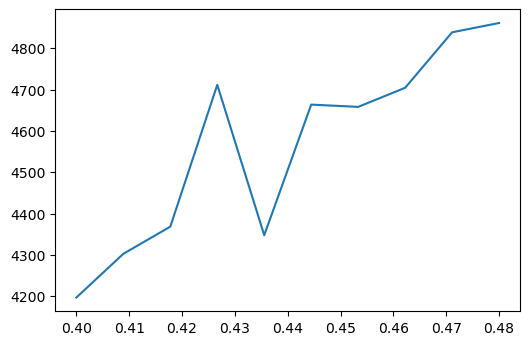

In [28]:
plt.plot(Betas, Ef)